### Simple Bi-Gram model ###

In this project, I am going to implement the simple probabilistic character level bi-gram model which will generate new city names.

This project is again highly inspired by the Andrej Karpathy's [video](https://youtu.be/PaCmpygFfXo) on bigram.

As usual we are going to start off with basic imports.

In [1]:
## Importing neccessary packages ##

import pandas as pd
import torch
import seaborn as sns
import matplotlib.pyplot as plt

First up we need to load our dataset. For this we are going to use the [US baby names dataset](https://www.kaggle.com/datasets/kaggle/us-baby-names).

In [2]:
names = pd.read_csv('NationalNames.csv')['Name'].values.tolist()
print(f'Total names are : {len(names)}')

Total names are : 1825433


So we have around 1.8M baby names as our dataset.

Now what we are going to do is make a numpy array of the unique characters and calculate the probability of all other characters following it from the dataset.

Now how many characters do we need to consider? Well, we can formulate the total number of characters by getting the set of all characters that there are in the entire dataset.But, we would add one more start/stop character " < TOK >" to enforce start and stop of a sentence.

In [3]:
## Checking total unique characters ##

characters = set()

for each_name in names:
    each_name = each_name.lower().strip()
    for char in each_name:
        characters.add(char)

characters = sorted(list(characters))
print(f'Length of the characters is {len(characters)}')

Length of the characters is 26


So there are in total 27 characters that we need to consider for generating new names for new places (with one added character for the " < TOK > " character).

So with this lets get our hands dirty and make our probability table.

But for the probability table we must have 2 extra mapping dictionary. One to map from the characters to numbers and one from the number to characters.

In [4]:
## Characters to numbers map ##

characters_2_indices = {k:v+1 for v,k in enumerate(characters)}
characters_2_indices['<TOK>'] = 0

## Numbers to characters map ##

indices_2_characters = {v+1:k for v,k in enumerate(characters)}
indices_2_characters[0] = '<TOK>'

In [5]:
## Building our scores table ##

count_table = torch.zeros((len(characters_2_indices) , len(characters_2_indices)))

for each_name in names:
    each_name = ['<TOK>'] + [*each_name.strip().lower()] + ['<TOK>']
    for char1 , char2 in zip(each_name, each_name[1:]):
        idx_1 = characters_2_indices[char1]
        idx_2 = characters_2_indices[char2]
        count_table[idx_1,idx_2] += 1

Visualizing the counts table.

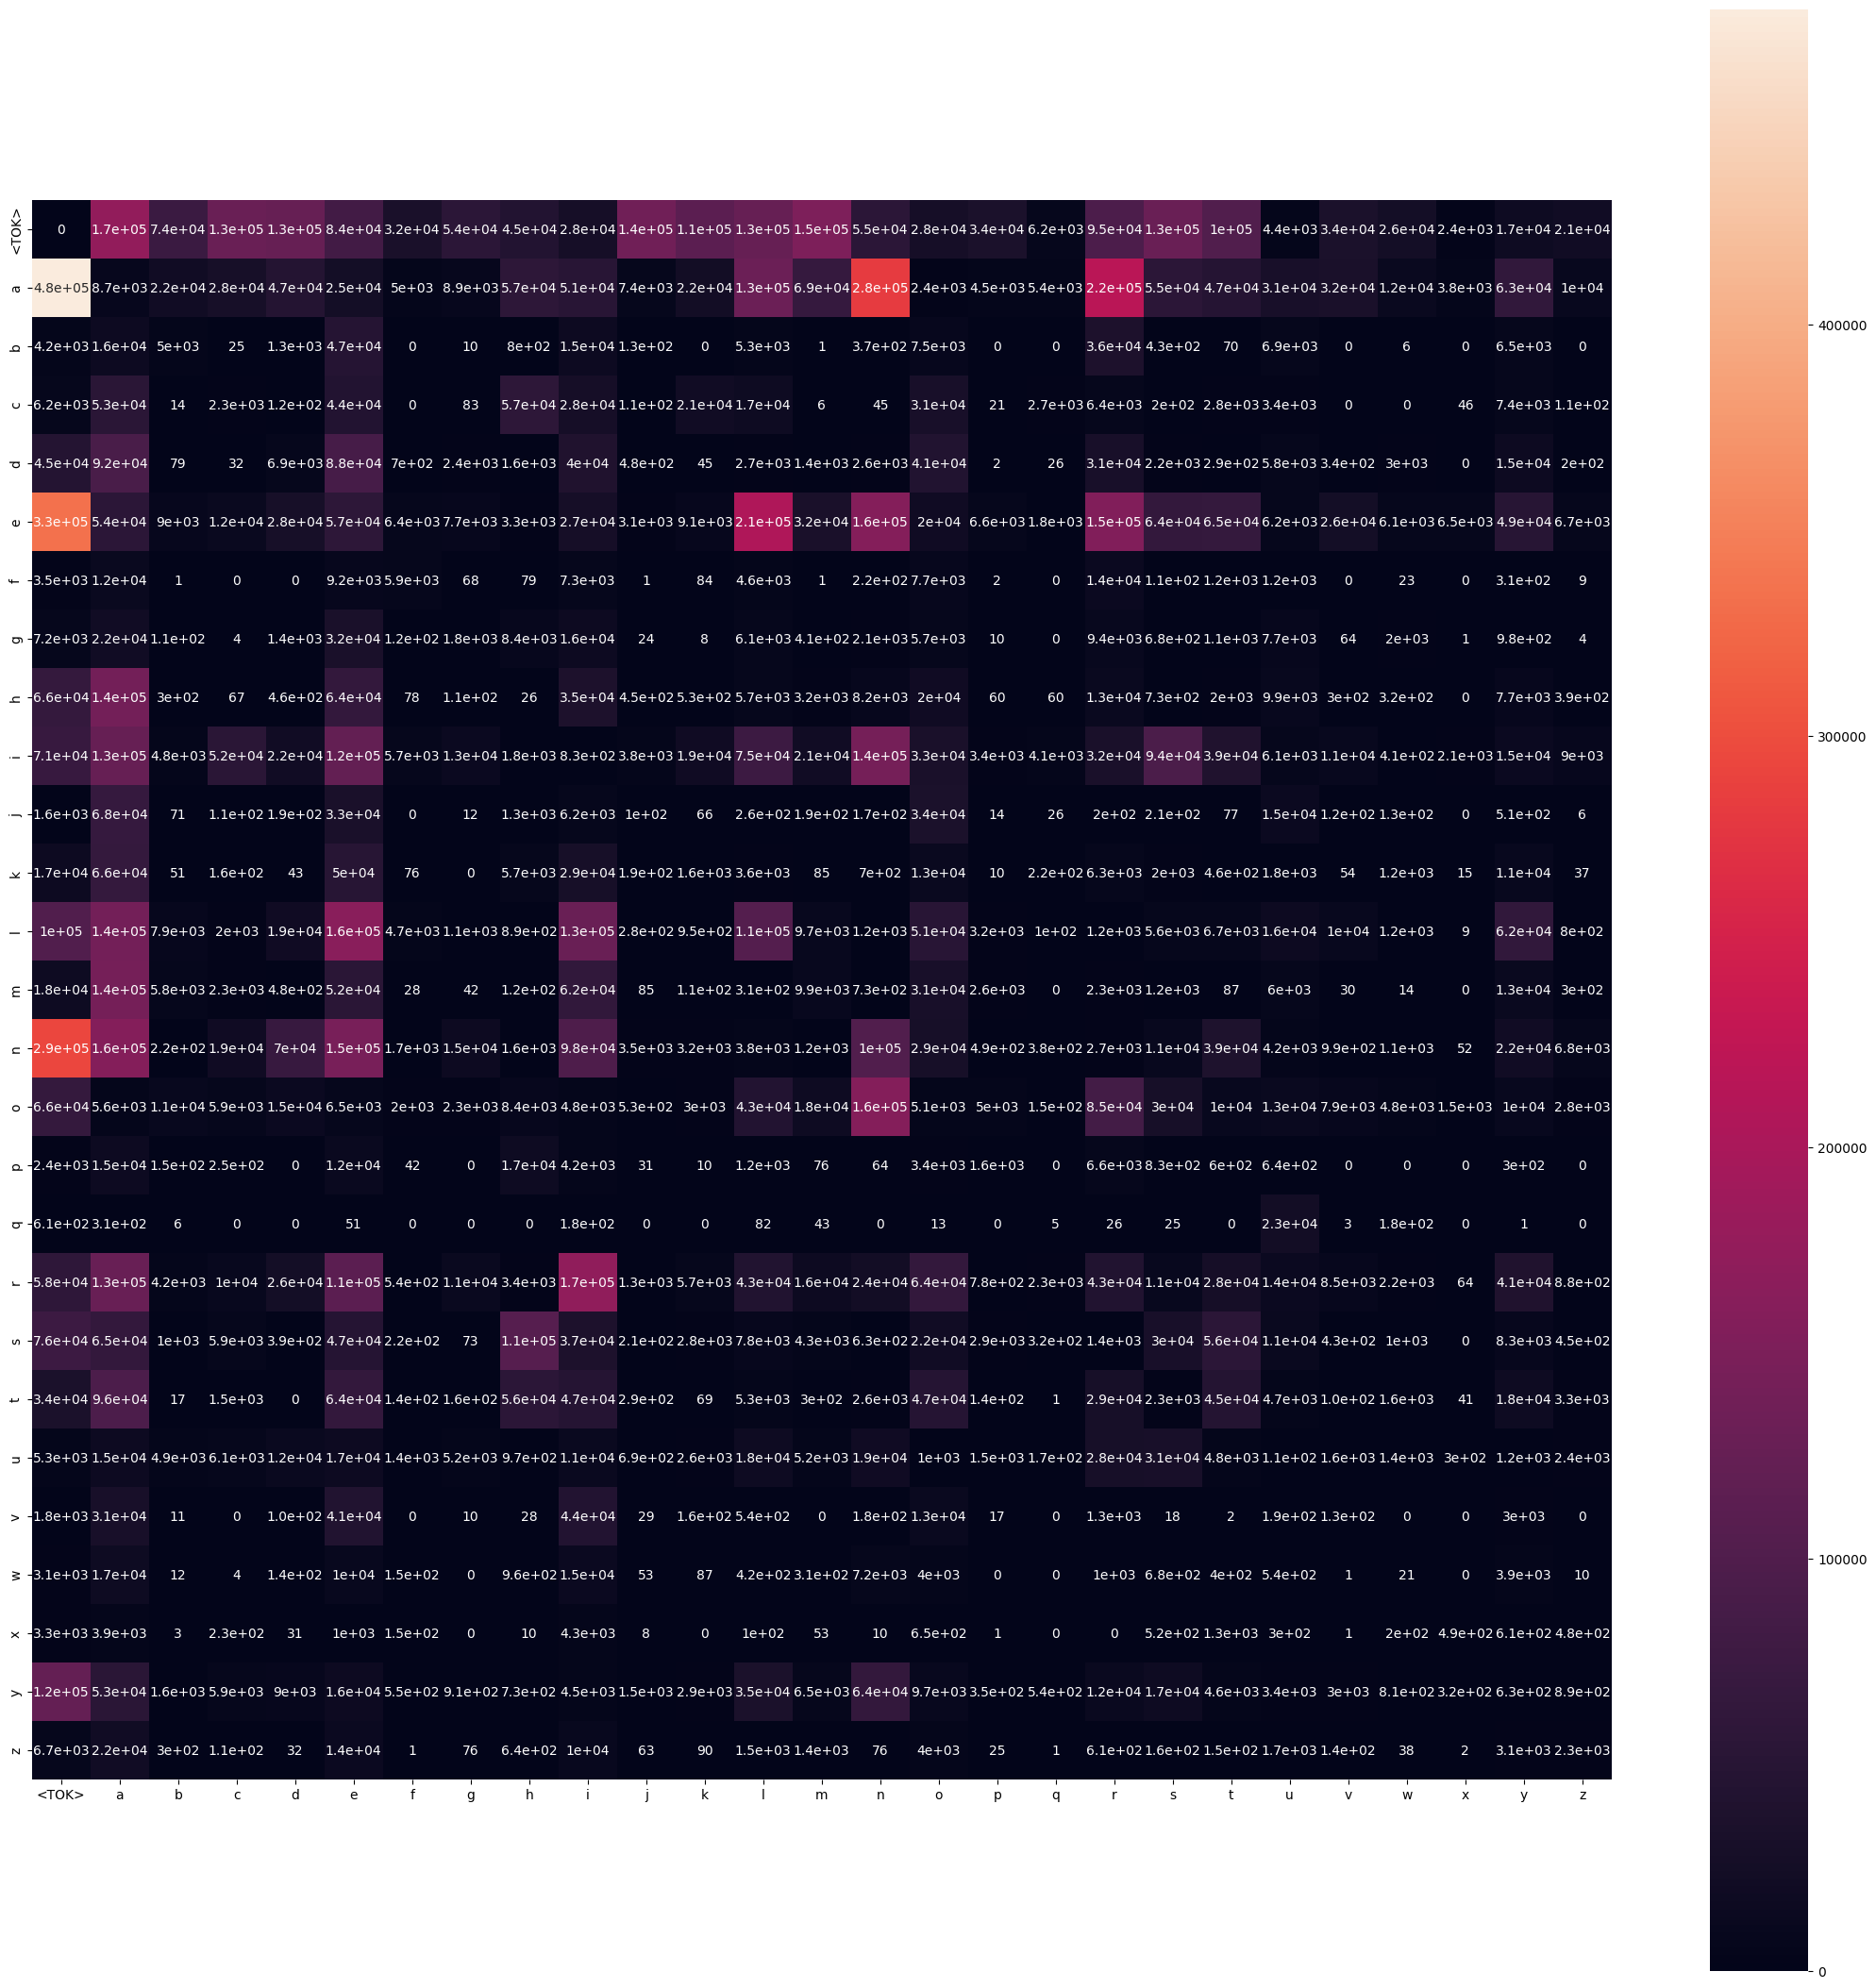

In [6]:
## Visualizing counts table ##

def visualize(table):

    xticklabels = yticklabels = ['<TOK>'] + characters 

    plt.figure(figsize=(27,27))

    sns.heatmap(table.numpy(), annot = True , xticklabels = xticklabels , yticklabels = yticklabels, square = True)

    plt.show()

visualize(count_table)

Amazing....

Now we have a scores table for the characters repeat count.

Now the thing is what we want to do is get the probabilities instead.

But before that, there might be certain 0's in the table... We need to fix them since there might be some problem during division. We do this by smoothing the values by adding one to all of them.

Lets do this.

In [7]:
## Smoothing count tables ##

count_table += 1

Now we must make the count table probability table.

How to do that you might wonder...

Well its very easy..

What we want to do is predict the next character given the current character. So what we can do is divide each of the rows by the sum of that row and with that we can get a probability table for next character given current character. 

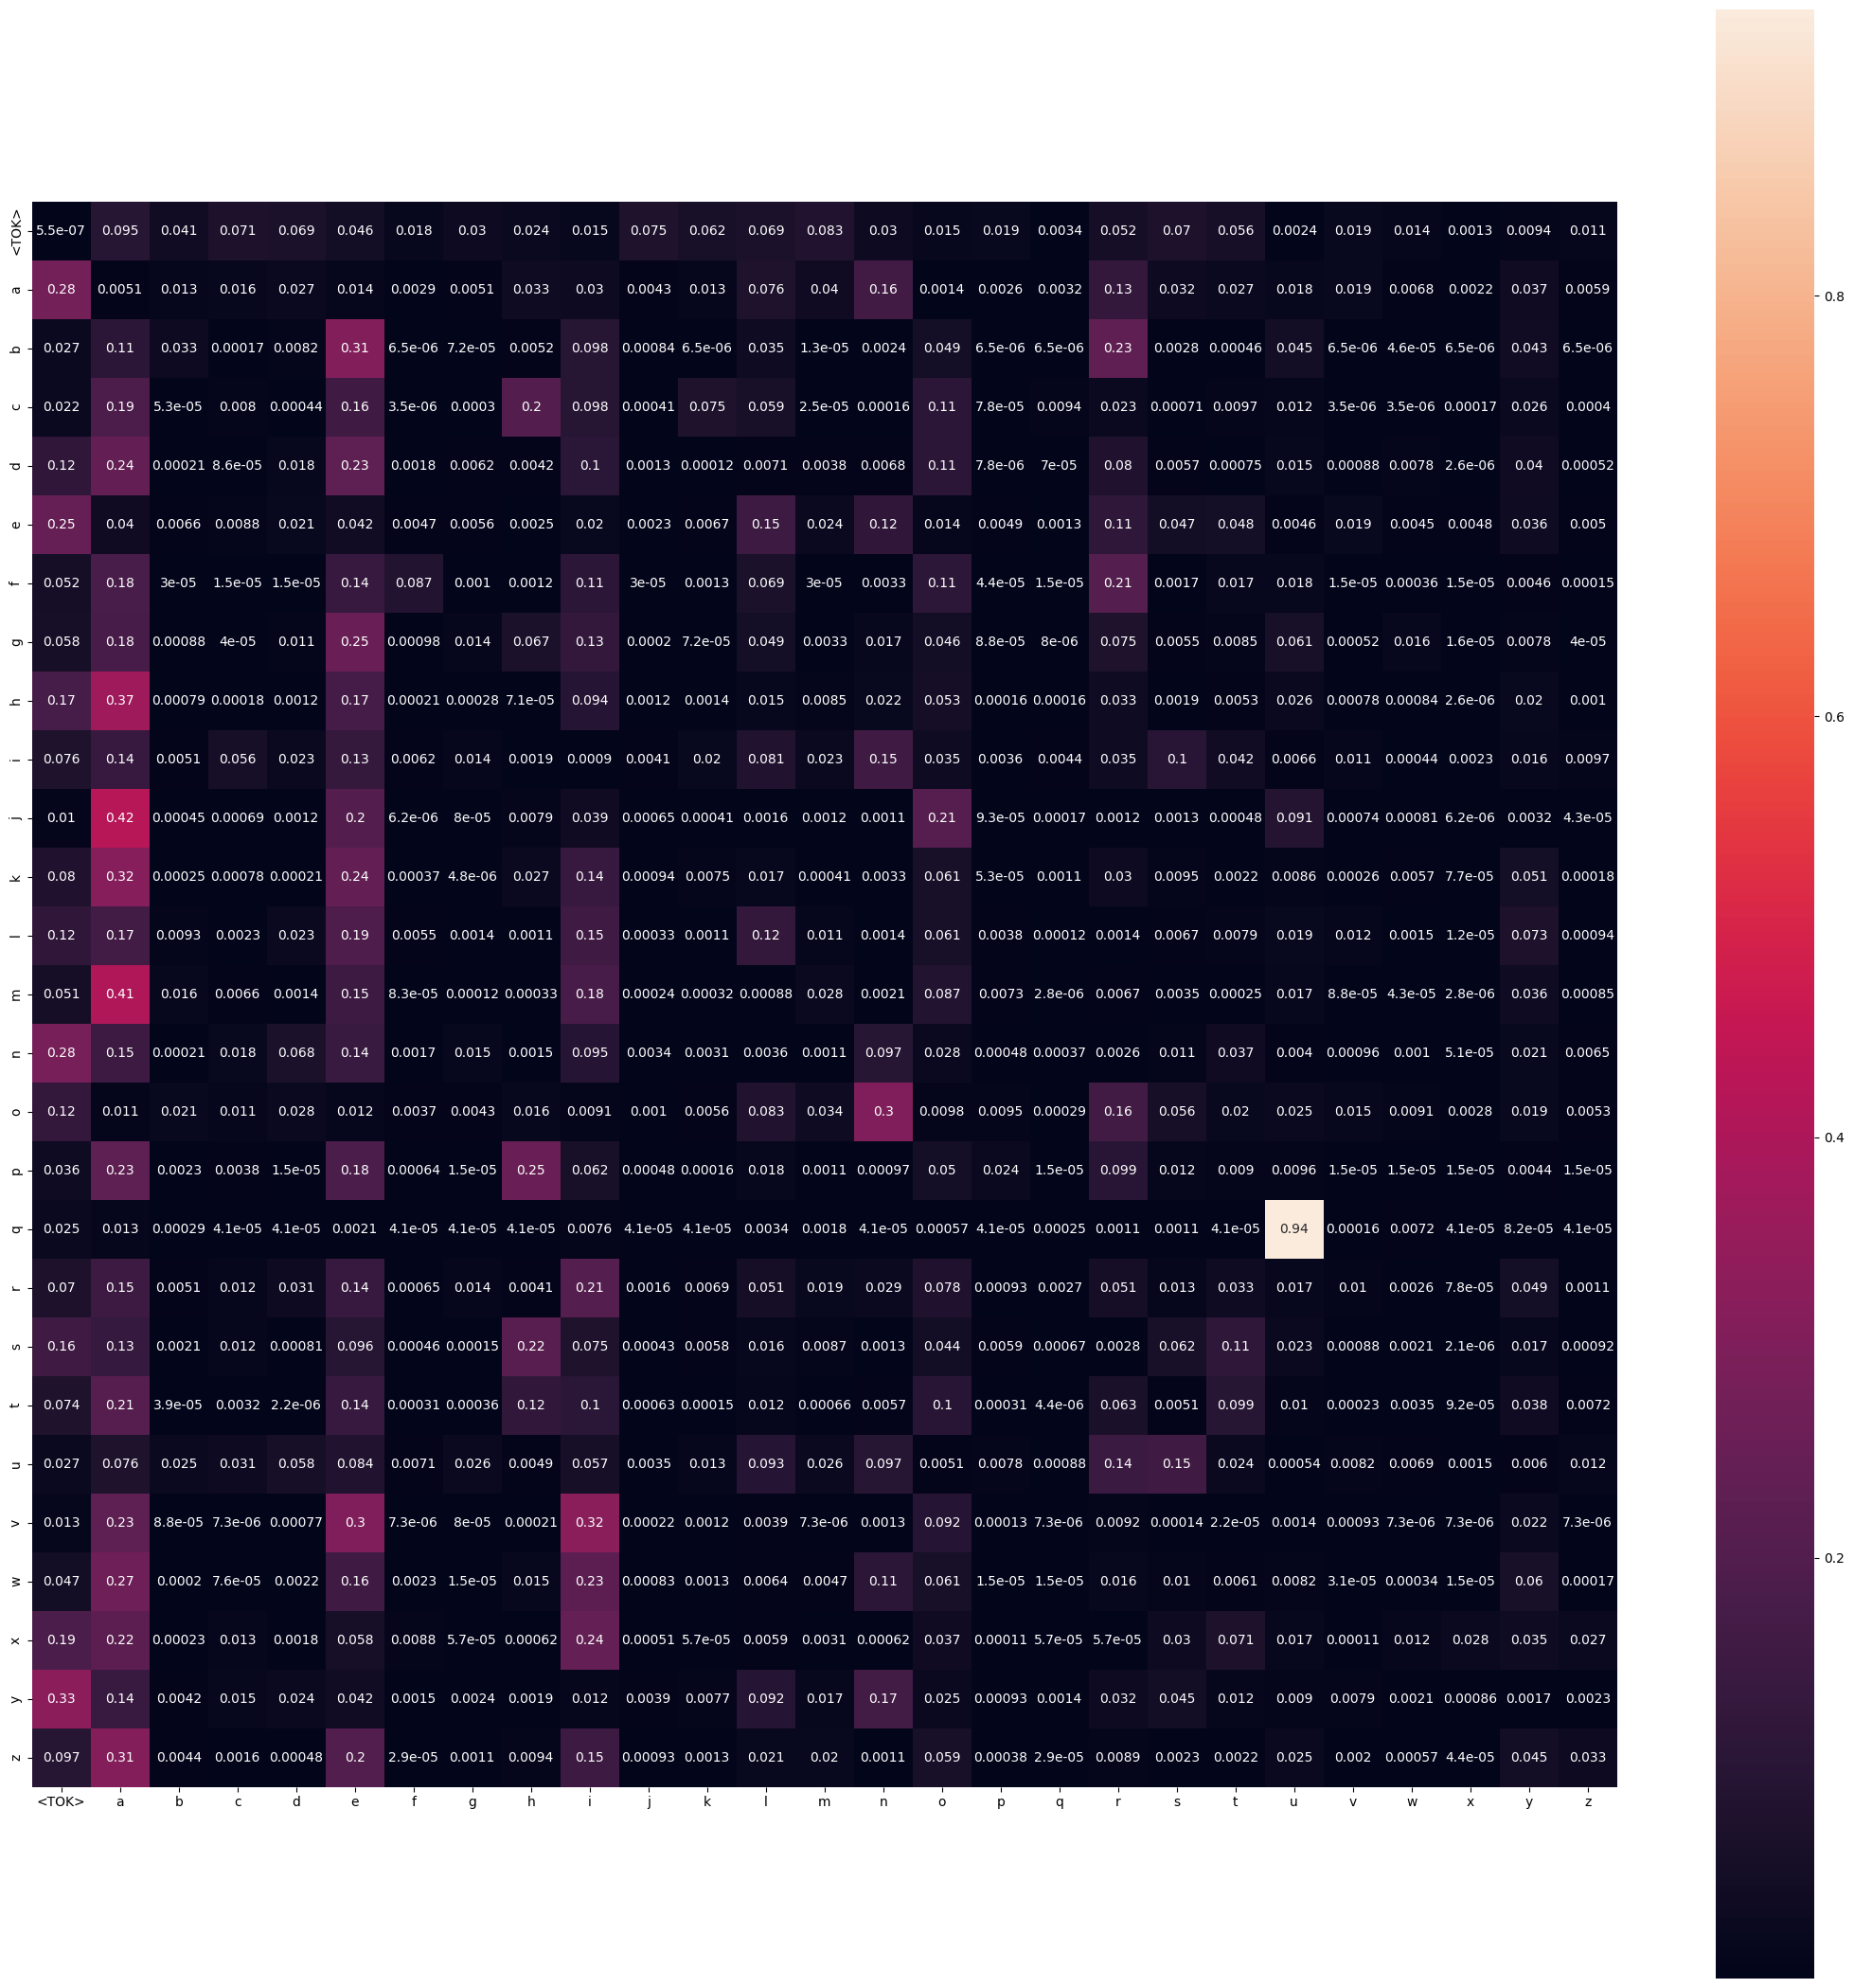

In [8]:
## Making probability table ##

prob_table = count_table / torch.sum(count_table , dim = 1 , keepdim = True)

visualize(prob_table)

Now let's do generation.

In [9]:
## Generating names ##

for _ in range(10):

    next_idx = int(characters_2_indices['<TOK>'])
    pred = ''

    while True:
        next_idx = torch.multinomial(prob_table[next_idx , :] , num_samples = 1)
        next_idx = next_idx.int().item()
        if next_idx == 0:
            break
        pred += indices_2_characters[next_idx]

    print(pred)

ta
e
ha
a
jeane
tha
kiosee
mshisiseenn
jaja
kiclos


And that's it.... This is the simplistic bigram model for generation of baby names. Not so good though. Haha.